## Applying EDA to the dataset

Loading libraries 

In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor

In [9]:
file_path = "testData123.csv"
df = pd.read_csv(file_path)
data = pd.DataFrame(df)

# View basic dataset information
print(data.info())
print(data.describe())
print(data.head())
print(data.isnull())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 994 entries, 0 to 993
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  994 non-null    int64  
 1   x           994 non-null    int64  
 2   y           994 non-null    int64  
 3   Co          994 non-null    float64
 4   Ni          994 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 39.0 KB
None
        Unnamed: 0            x            y          Co          Ni
count   994.000000   994.000000   994.000000  994.000000  994.000000
mean    554.744467  1526.773642  1508.047284   10.654676   18.037711
std     599.922027   898.805520   888.074501    4.274285    5.816564
min       1.000000     0.000000     0.000000    0.765974    2.731171
25%     249.250000   800.000000   800.000000    7.553816   13.977878
50%     497.500000  1500.000000  1500.000000   10.235672   17.022180
75%     745.750000  2300.000000  2300.000000   13.042202   21.820301
m

,Unnamed: 0,x,y,Co,Ni
0,1,0,0,13.806581,30.989946
1,2,100,0,11.960641,25.908922
2,3,200,0,8.742101,25.617748
3,4,300,0,14.047969,23.771229
4,5,400,0,15.727333,27.367336


Missing Values:
 Unnamed: 0    0
x             0
y             0
Co            0
Ni            0
dtype: int64


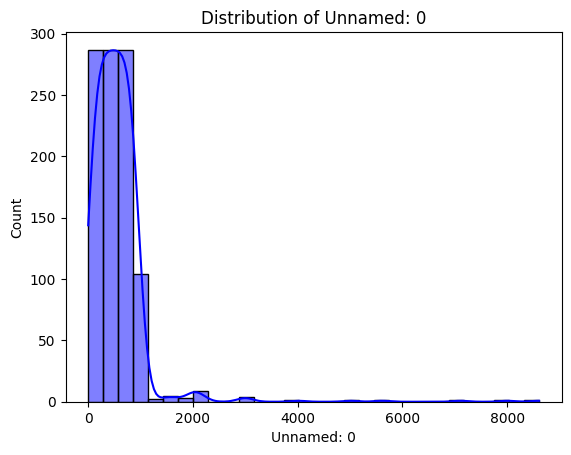

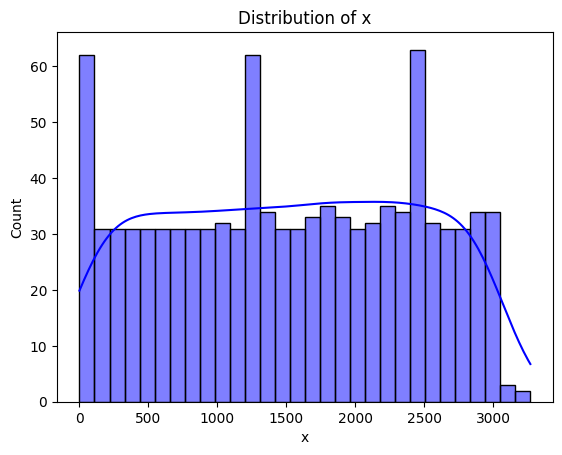

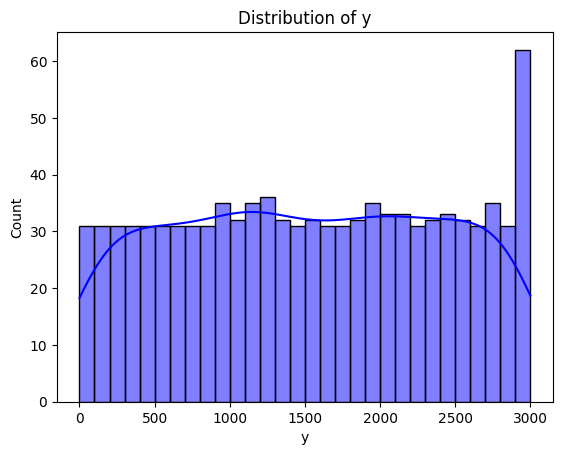

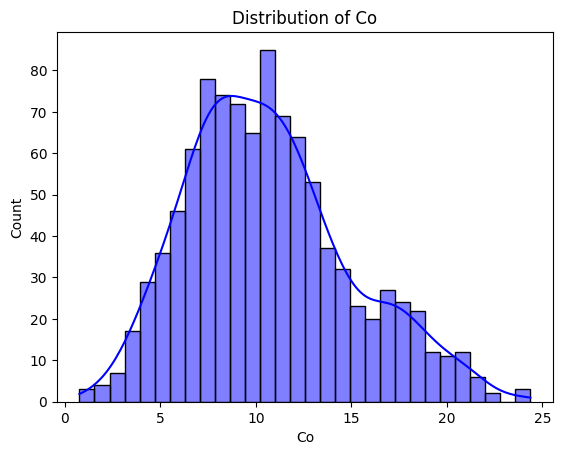

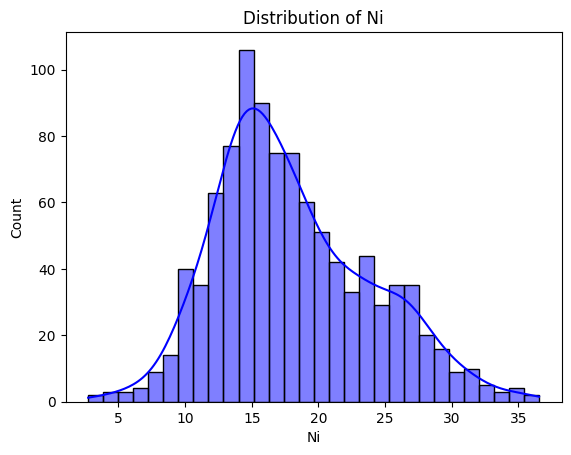

Skewness of variables:
 Unnamed: 0    7.305230
x            -0.024068
y            -0.010501
Co            0.536128
Ni            0.523881
dtype: float64


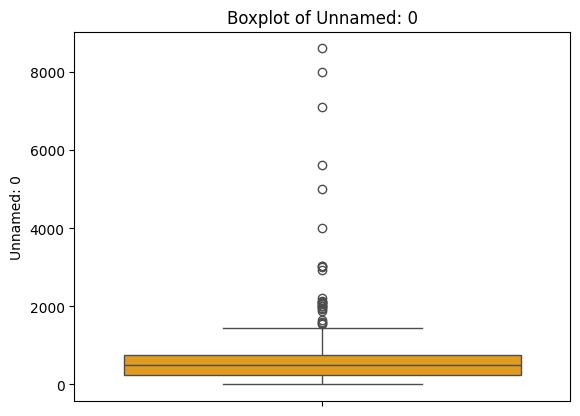

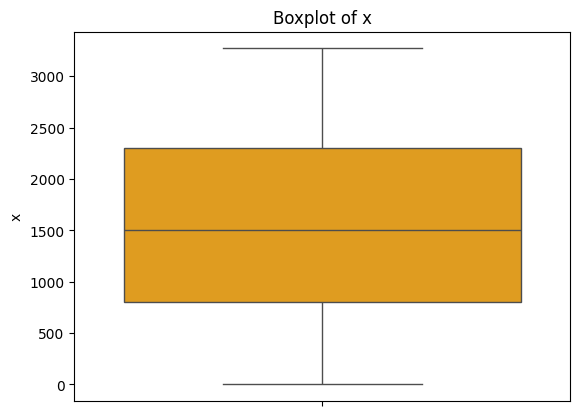

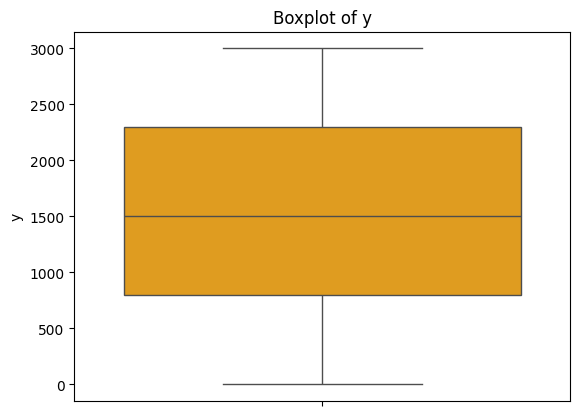

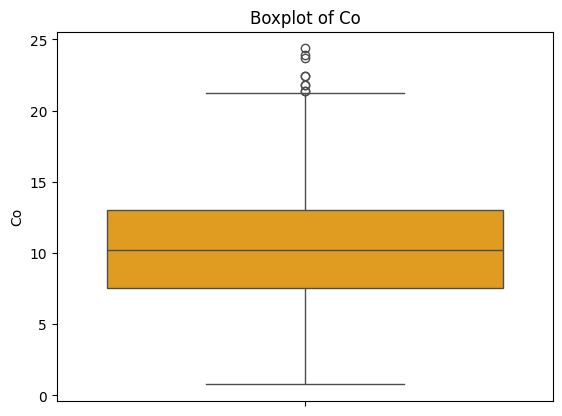

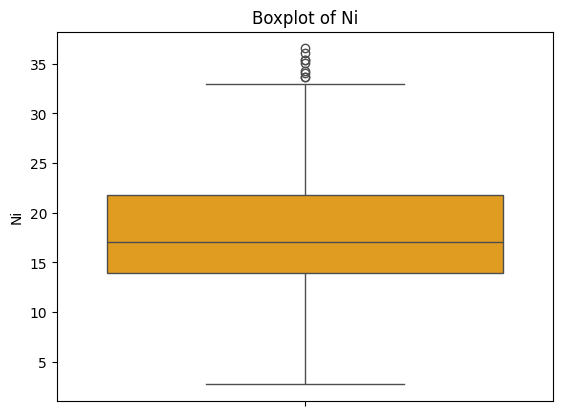

Correlation Matrix:
             Unnamed: 0         x         y        Co        Ni
Unnamed: 0    1.000000  0.132574  0.487331 -0.043368 -0.075450
x             0.132574  1.000000  0.008204 -0.537365 -0.680028
y             0.487331  0.008204  1.000000  0.026717 -0.049709
Co           -0.043368 -0.537365  0.026717  1.000000  0.518704
Ni           -0.075450 -0.680028 -0.049709  0.518704  1.000000


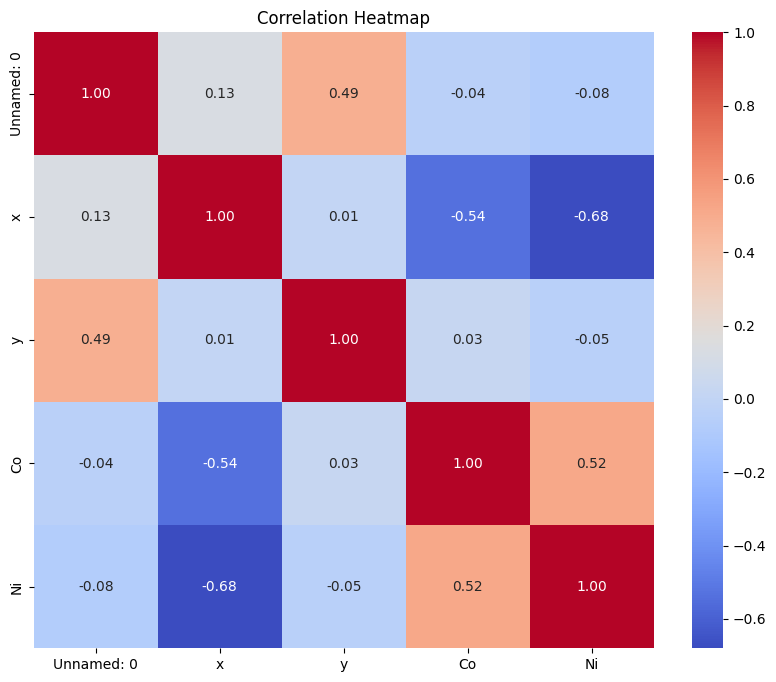

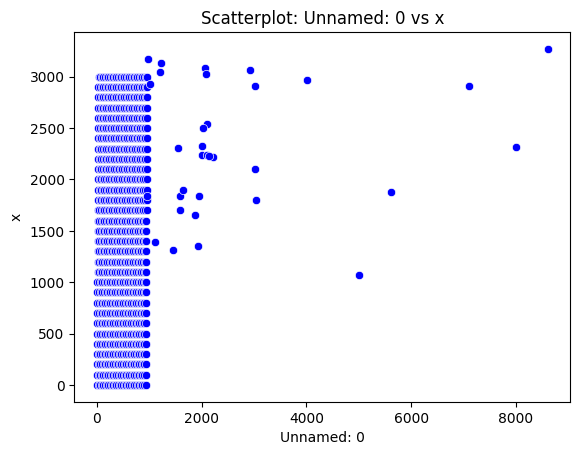

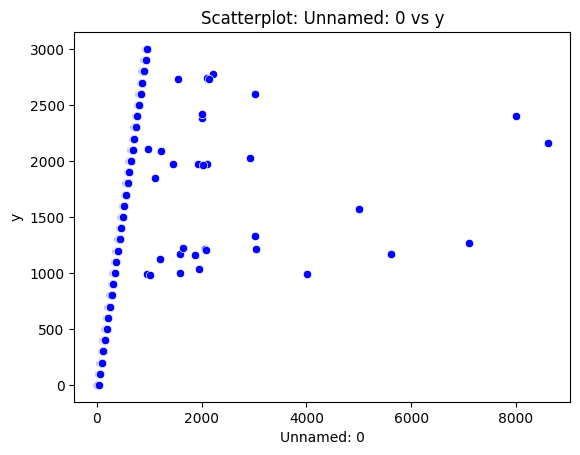

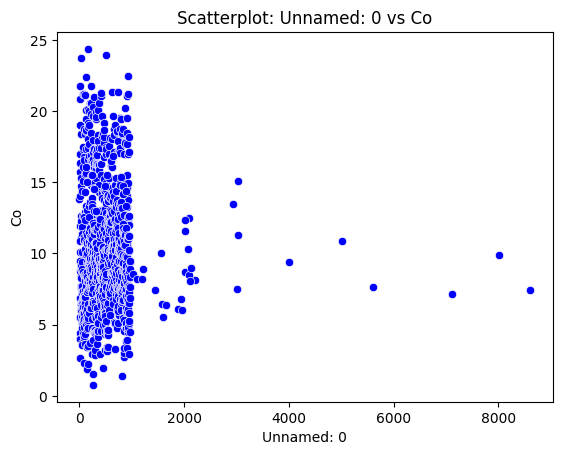

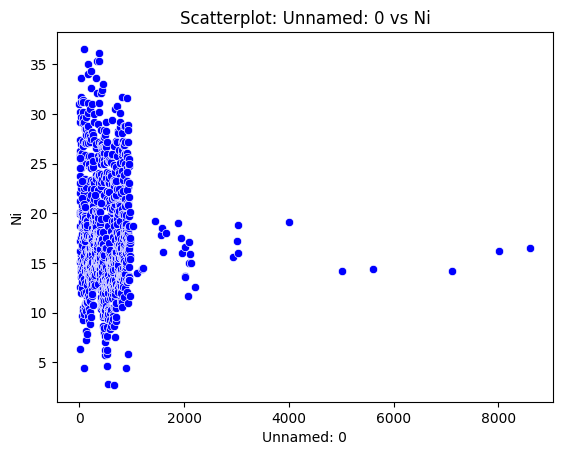

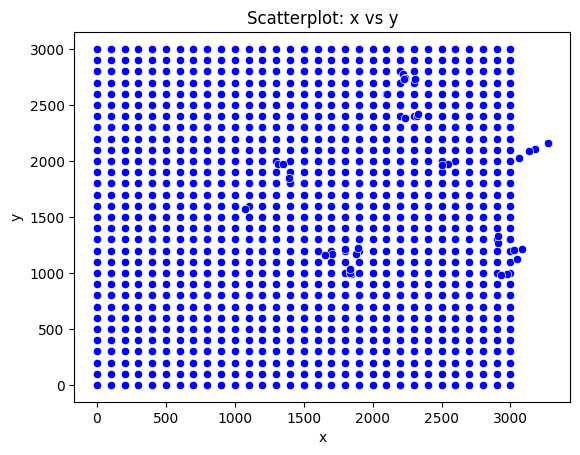

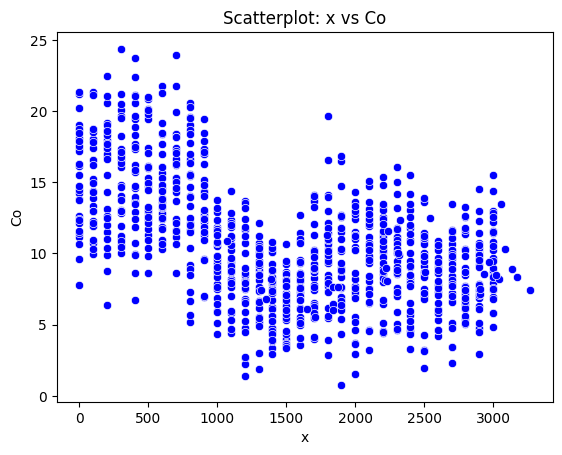

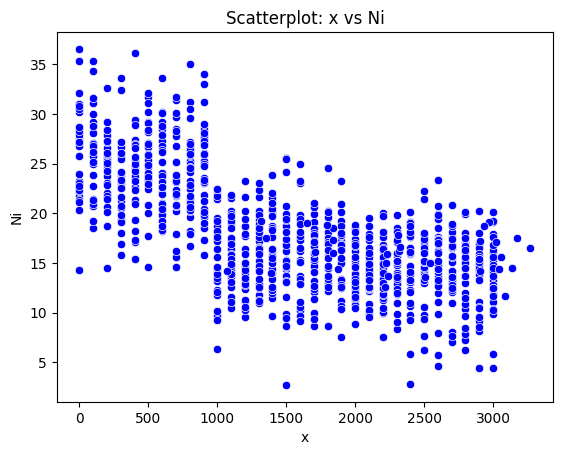

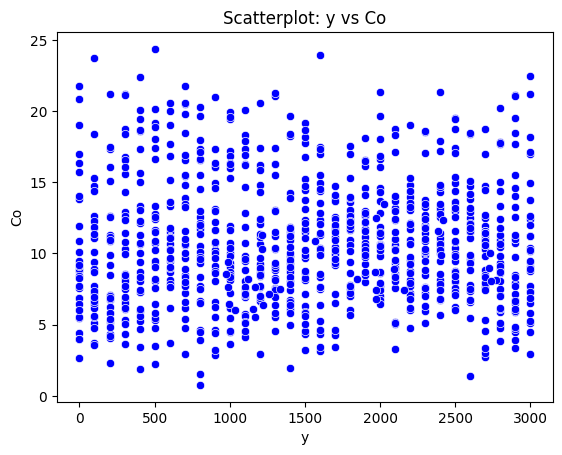

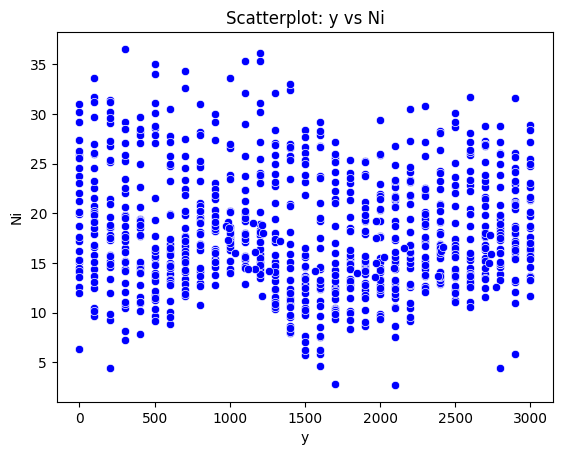

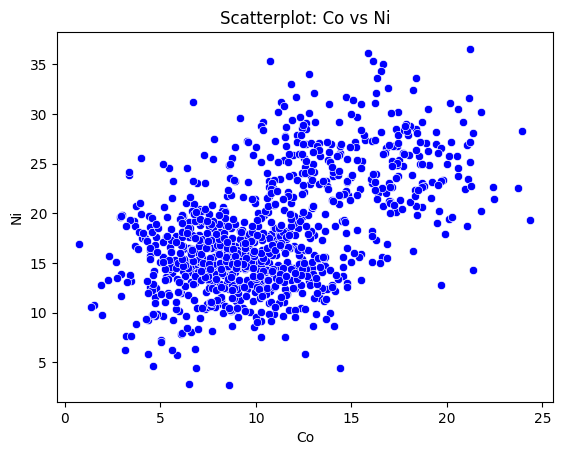

In [4]:

# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

# Distribution of numeric variables
numeric_columns = data.select_dtypes(include=[np.number])

for col in numeric_columns.columns:
    plt.figure()
    sns.histplot(data[col], bins=30, kde=True, color='blue')
    plt.title(f"Distribution of {col}")
    plt.show()

# Skewness of numeric variables
skewness_values = numeric_columns.apply(lambda x: skew(x.dropna()))
print("Skewness of variables:\n", skewness_values)

# Detect outliers using boxplots
for col in numeric_columns.columns:
    plt.figure()
    sns.boxplot(y=data[col], color='orange')
    plt.title(f"Boxplot of {col}")
    plt.show()

# Correlation matrix
cor_matrix = numeric_columns.corr()
print("Correlation Matrix:\n", cor_matrix)

# Heatmap for correlations
plt.figure(figsize=(10, 8))
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

# Scatterplots for dependencies
numeric_pairs = numeric_columns.columns
for i in range(len(numeric_pairs)):
    for j in range(i + 1, len(numeric_pairs)):
        x, y = numeric_pairs[i], numeric_pairs[j]
        plt.figure()
        sns.scatterplot(x=data[x], y=data[y], color='blue')
        plt.title(f"Scatterplot: {x} vs {y}")
        plt.show()

# Spatial data visualization (if Longitude and Latitude exist)
if 'Longitude' in data.columns and 'Latitude' in data.columns:
    plt.figure()
    sns.scatterplot(x=data['Longitude'], y=data['Latitude'], color='red')
    plt.title("Spatial Distribution")
    plt.show()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 994 entries, 0 to 993
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  994 non-null    int64  
 1   x           994 non-null    int64  
 2   y           994 non-null    int64  
 3   Co          994 non-null    float64
 4   Ni          994 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 39.0 KB


## Machine Learning Algorithms

Linear Regression Mean Squared Error: 0.0029
Neural Network Mean Squared Error (MLPRegressor): 0.0032


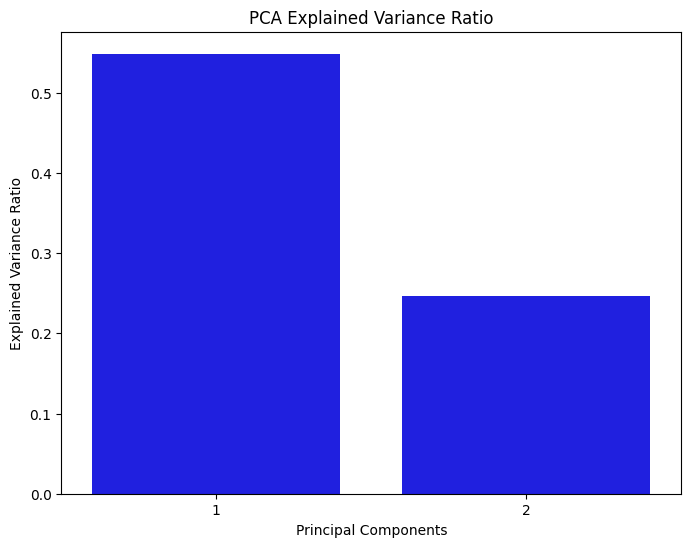

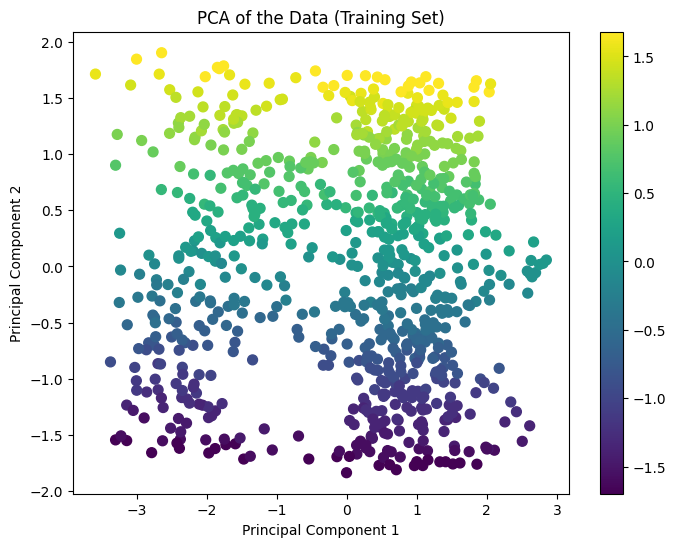

In [16]:

# Step 1: Clean the data
# Drop unnecessary columns (Unnamed: 0 column)
data_cleaned = data.drop(columns=['Unnamed: 0'])

# Step 2: Handle missing values (if any)
imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(data_cleaned), columns=data_cleaned.columns)

# Step 3: Feature scaling (Standardize the data)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_imputed)

# Step 4: Split the data into features and target variable
# In this case, there is no explicit target column, so we'll use 'x', 'y', 'Co', 'Ni' as features
X = data_scaled  # Using all columns as features
y = data_scaled[:, 1]  # Let's assume we predict 'y' as the target (or any other column you choose)

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Apply PCA (Principal Component Analysis)
# Reduce the data to 2 components for visualization (or choose n_components=0.95 for 95% explained variance)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Step 6: Train and evaluate Linear Regression (instead of Logistic Regression)
linear_reg = LinearRegression()
linear_reg.fit(X_train_pca, y_train)
y_pred_linear_reg = linear_reg.predict(X_test_pca)

# Step 7: Evaluate the model using Mean Squared Error (for regression)
mse = mean_squared_error(y_test, y_pred_linear_reg)
print(f"Linear Regression Mean Squared Error: {mse:.4f}")

# Step 7: Train and evaluate Neural Network (MLPRegressor) for regression
nn_model = MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=1000, random_state=42)
nn_model.fit(X_train_pca, y_train)

# Predict using the trained model
y_pred_nn = nn_model.predict(X_test_pca)

# Step 8: Evaluate the model using Mean Squared Error (MSE) for regression
mse_nn = mean_squared_error(y_test, y_pred_nn)
print(f"Neural Network Mean Squared Error (MLPRegressor): {mse_nn:.4f}")

# Step 8: Visualize PCA explained variance
explained_variance = pca.explained_variance_ratio_
plt.figure(figsize=(8, 6))
sns.barplot(x=np.arange(1, len(explained_variance) + 1), y=explained_variance, color='blue')
plt.title('PCA Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.show()

# Step 9: Optional - Visualize the data in PCA space
plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', s=50)
plt.title('PCA of the Data (Training Set)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()
